### Importação dos dados do Excel 

In [392]:
import pandas as pd

In [393]:
arquivo = pd.ExcelFile("Downloads/(desafio)_base_case_estágio_em_sucesso_do_cliente_-_dados_&_processos.xlsx")
print(arquivo.sheet_names)

['Atividades', 'Clientes']


In [394]:
atividades = pd.read_excel(arquivo, sheet_name="Atividades")
clientes = pd.read_excel(arquivo, sheet_name="Clientes")

### Limpeza e Padronização dos Dados

In [396]:
# Aqui estou removendo espaços extras nos nomes de colunas
atividades.columns = atividades.columns.str.strip()

In [397]:
# Padronizando os campos de texto para minúsculas e removendo espaços extras
colunas_texto_atividades = ['Cliente', 'Responsável', 'Tipo', 'Prioridade', 'Status', 'Observações']
for col in colunas_texto_atividades:
    atividades[col] = atividades[col].str.strip().str.lower()

In [398]:
# Corrigindo as datas
atividades['Prazo de Conclusão'] = pd.to_datetime(atividades['Prazo de Conclusão'], errors='coerce')
atividades['Data de Conclusão'] = pd.to_datetime(atividades['Data de Conclusão'], errors='coerce')

In [399]:
# Preencher valores nulos nas "Observações" com uma string padrão (como 'sem observação')
atividades['Observações'] = atividades['Observações'].fillna("sem observação")

In [400]:
# Verificar a existência de  valores nulos depois da limpeza
print(atividades.isnull().sum())

Cliente                 0
Responsável             0
Tipo                    0
Prioridade              0
Prazo de Conclusão      0
Data de Conclusão     180
Status                  0
Observações             0
dtype: int64


In [401]:
# Unificar os valores "e-mail" e "email" em "e-mail"
atividades['Tipo'] = atividades['Tipo'].str.replace('email', 'e-mail', case=False)


In [402]:
# Verificar se a substituição foi feita corretamente
print(atividades['Tipo'].unique())

['reunião com o cliente' 'ligação' 'atividade' 'reunião interna' 'e-mail'
 'tarefa' 'whatsapp']


In [403]:
display(atividades)

,Cliente,Responsável,Tipo,Prioridade,Prazo de Conclusão,Data de Conclusão,Status,Observações
0,cliente 1,ana,reunião com o cliente,alta,2025-01-01,2025-01-06,concluída,problemas técnicos
1,cliente 1,ana,ligação,baixa,2025-01-03,NaT,vencida,sem observação
2,cliente 1,ana,atividade,alta,2025-01-04,NaT,vencida,sem observação
3,cliente 1,ana,reunião com o cliente,alta,2025-01-18,2025-01-19,concluída,problema técnico
4,cliente 1,ana,reunião interna,alta,2025-01-21,2025-01-18,concluída,sem observação
...,...,...,...,...,...,...,...,...
1008,cliente 91,ana,whatsapp,alta,2025-02-06,2025-02-11,concluída,sem observação
1009,cliente 91,ana,reunião com o cliente,alta,2025-02-11,2025-02-19,concluída,problemas técnicos
1010,cliente 92,ana,reunião com o cliente,baixa,2025-03-16,2025-03-20,concluída,treinamento
1011,cliente 93,ana,tarefa,baixa,2025-02-06,2025-02-11,concluída,sem observação


In [404]:
# Eliminando espaços extras em nomes de colunas
clientes.columns = clientes.columns.str.strip()

In [405]:
# Padronizando texto como minúsculas nas colunas relevantes
clientes['Cliente'] = clientes['Cliente'].str.strip().str.lower()
clientes['Responsável'] = clientes['Responsável'].str.strip().str.lower()
clientes['Fase'] = clientes['Fase'].str.strip().str.lower()

In [406]:
# Verificando se possui valores nulos
print(clientes.isnull().sum())

Cliente        0
Responsável    0
MRR            0
Fase           0
dtype: int64


In [407]:
display(clientes)

,Cliente,Responsável,MRR,Fase
0,cliente 1,ana,15971,acompanhamento
1,cliente 10,rafael,1299,onboarding
2,cliente 108,pedro,2890,adoção
3,cliente 109,pedro,1165,adoção
4,cliente 11,ana,17629,adoção
...,...,...,...,...
102,cliente 9,pedro,3820,adoção
103,cliente 90,rafael,3029,acompanhamento
104,cliente 91,ana,12346,adoção
105,cliente 92,ana,11240,acompanhamento


In [408]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Cliente      107 non-null    object
 1   Responsável  107 non-null    object
 2   MRR          107 non-null    int64 
 3   Fase         107 non-null    object
dtypes: int64(1), object(3)
memory usage: 3.5+ KB


In [409]:
# Alterar o tipo de MRR para float 
clientes['MRR'] = clientes['MRR'].astype(float)

# Configurando o pandas para exibir apenas  números com 2 casas decimais
pd.options.display.float_format = '{:.2f}'.format

In [410]:
display(clientes)

,Cliente,Responsável,MRR,Fase
0,cliente 1,ana,15971.00,acompanhamento
1,cliente 10,rafael,1299.00,onboarding
2,cliente 108,pedro,2890.00,adoção
3,cliente 109,pedro,1165.00,adoção
4,cliente 11,ana,17629.00,adoção
...,...,...,...,...
102,cliente 9,pedro,3820.00,adoção
103,cliente 90,rafael,3029.00,acompanhamento
104,cliente 91,ana,12346.00,adoção
105,cliente 92,ana,11240.00,acompanhamento


### Análise Exploratória

In [412]:
# Verificando o número de interações por cliente
interacoes_cliente = atividades.groupby('Cliente').size().reset_index(name='Interações')

# Exibir as 10 empresas com mais interações
interacoes_cliente.sort_values(by='Interações', ascending=False).head(10)

,Cliente,Interações
13,cliente 21,40
2,cliente 11,34
10,cliente 19,29
44,cliente 5,27
88,cliente 9,26
77,cliente 8,25
55,cliente 6,25
33,cliente 4,24
16,cliente 24,24
11,cliente 2,24


In [413]:
# Juntando as duas bases para usar o MRR na análise
df_merged = pd.merge(atividades, clientes, left_on='Cliente', right_on='Cliente', how='left')

# Média de MRR por fase
mrr_fase = df_merged.groupby('Fase')['MRR'].mean()
print(mrr_fase)

Fase
acompanhamento   8623.64
adoção           8509.65
onboarding       7708.47
Name: MRR, dtype: float64


In [414]:
# Contagem de atividades por status
status_atividades = atividades['Status'].value_counts()
print(status_atividades)

Status
concluída    833
vencida      180
Name: count, dtype: int64


### Diferenciais na transformação dos Dados

In [416]:
# Clientes com MRR alto mas poucas interações
resumo_ativos = df_merged.groupby(['Cliente', 'Fase']).agg(
    interacoes=('Cliente', 'count'),
    mrr=('MRR', 'mean')
).reset_index()

In [417]:
# Filtrando clientes com menos de 3 interações
clientes_poucas_interacoes = resumo_ativos[resumo_ativos['interacoes'] < 3]
clientes_poucas_interacoes.sort_values(by='mrr', ascending=False).head(10)

,Cliente,Fase,interacoes,mrr
82,cliente 84,acompanhamento,2,17334.00
92,cliente 93,acompanhamento,2,16110.00
90,cliente 91,adoção,2,12346.00
91,cliente 92,acompanhamento,1,11240.00
84,cliente 86,acompanhamento,2,7677.00
23,cliente 30,adoção,1,4753.00
83,cliente 85,onboarding,2,4139.00
85,cliente 87,acompanhamento,2,3684.00
89,cliente 90,acompanhamento,2,3029.00
86,cliente 88,acompanhamento,2,1892.00


### Criando gráficos para melhor visualizar os Insights

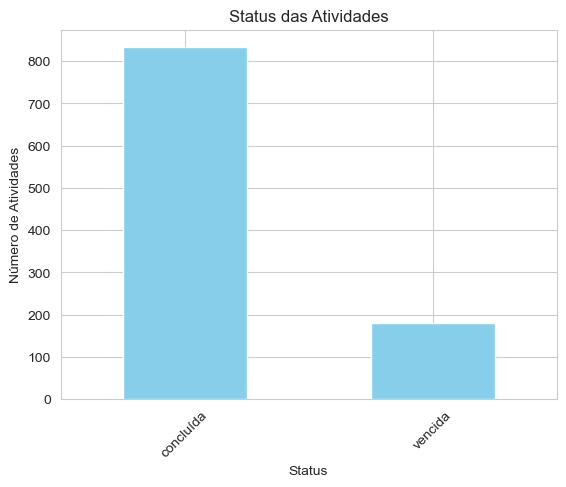

In [419]:
import matplotlib.pyplot as plt

# Gráfico de barras do status das atividades
status_atividades.plot(kind='bar', color='skyblue')
plt.title('Status das Atividades')
plt.xlabel('Status')
plt.ylabel('Número de Atividades')
plt.xticks(rotation=45)
plt.show()

# FIM

# Etapa 1 -  Análise de Dados
### Quais os 3 principais insights sobre a performance do time?

### 1. Tarefas não concluídas (Mais de 15% das tarefas não estão concluídas, indicando que a equipe deve priorizar essas tarefas)

In [423]:
total_atividades = len(atividades)

# Quantas não possui data de conclusão
nao_concluidas = atividades['Data de Conclusão'].isna().sum()

# Percentual de não concluídas
percentual_nao_concluidas = (nao_concluidas / total_atividades) * 100

print(f"Total de atividades: {total_atividades}")
print(f"Tarefas não concluídas: {nao_concluidas} ({percentual_nao_concluidas:.2f}%)")

Total de atividades: 1013
Tarefas não concluídas: 180 (17.77%)


### Visualização em gráfico para melhor compreensão

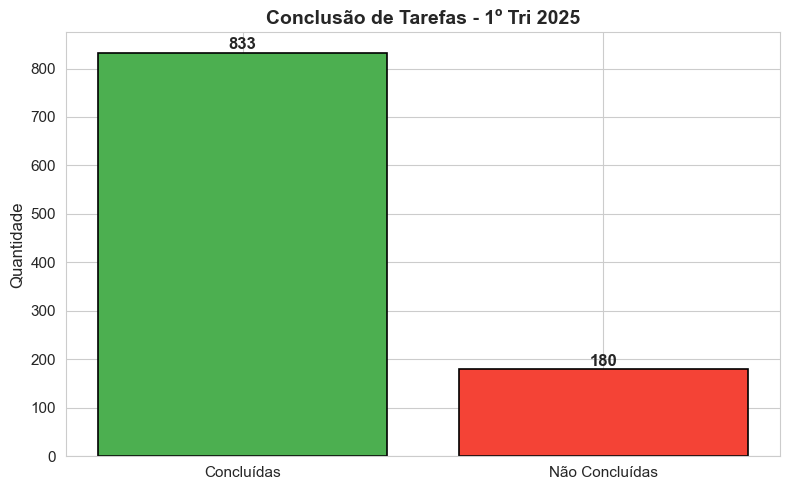

In [426]:
import matplotlib.pyplot as plt
import seaborn as sns

# Estilo visual elegante
sns.set_style("whitegrid")

# Dados
concluidas = total_atividades - nao_concluidas
nao_concluidas_valor = nao_concluidas
categorias = ['Concluídas', 'Não Concluídas']
valores = [concluidas, nao_concluidas_valor]
cores = ['#4caf50', '#f44336']

# Tamanho da figura
plt.figure(figsize=(8, 5))

# Criar gráfico de barras
barras = plt.bar(categorias, valores, color=cores, edgecolor='black', linewidth=1.2)

# Adicionar anotações nos valores das barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2, altura + 0.5, f'{int(altura)}',
             ha='center', va='bottom', fontsize=12, fontweight='bold')

# Título e rótulos
plt.title('Conclusão de Tarefas - 1º Tri 2025', fontsize=14, fontweight='bold')
plt.ylabel('Quantidade', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Melhorar o layout
plt.tight_layout()
plt.show()


### 2. Atividades com alta prioridade não estão sendo concluídas no prazo, com risco direto para a experiência do cliente

In [429]:
# Filtrar apenas atividades de alta prioridade
alta_prioridade = atividades[atividades['Prioridade'].str.lower() == 'alta']

# 1. Atrasadas (concluídas após o prazo)
atrasadas = alta_prioridade[
    (alta_prioridade['Data de Conclusão'].notna()) & 
    (alta_prioridade['Data de Conclusão'] > alta_prioridade['Prazo de Conclusão'])
]

# 2. Não concluídas
nao_concluidas = alta_prioridade[alta_prioridade['Data de Conclusão'].isna()]

# Resultado final
print(f"Total de atividades de Alta Prioridade: {len(alta_prioridade)}")
print(f"Atrasadas: {len(atrasadas)}")
print(f"Não Concluídas: {len(nao_concluidas)}")

Total de atividades de Alta Prioridade: 435
Atrasadas: 277
Não Concluídas: 64


### Em gráfico

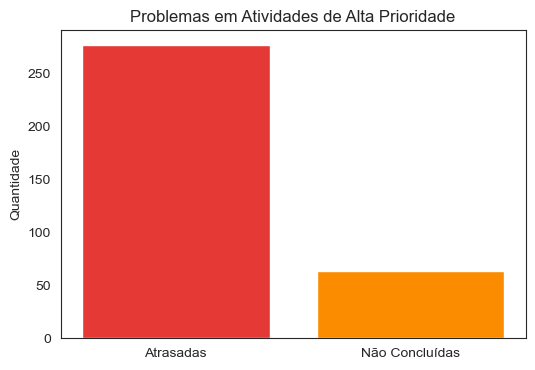

In [431]:
plt.figure(figsize=(6,4))
plt.bar(['Atrasadas', 'Não Concluídas'], [len(atrasadas), len(nao_concluidas)], color=['#e53935', '#fb8c00'])
plt.title('Problemas em Atividades de Alta Prioridade')
plt.ylabel('Quantidade')
plt.show()

### 3. Ponto de melhoria que poderia ser executado para melhor organização das informações:
### Foi constatado baixo uso do campo “Observações” e isso pode indicar perda de contexto das interações, podendo diminuir por exemplo a capacidade de tomar decisões baseadas no contexto anterior

In [433]:
# Contar quantas observações são apenas "sem observação"
sem_obs = atividades[atividades['Observações'].str.lower().str.strip() == 'sem observação']
com_obs = atividades[atividades['Observações'].str.lower().str.strip() != 'sem observação']

# Totais
total = len(atividades)

print(f"Sem observação: {len(sem_obs)} ({len(sem_obs)/total:.1%})")
print(f"Observações informativas: {len(com_obs)} ({len(com_obs)/total:.1%})")

Sem observação: 555 (54.8%)
Observações informativas: 458 (45.2%)


#### Em gráfico

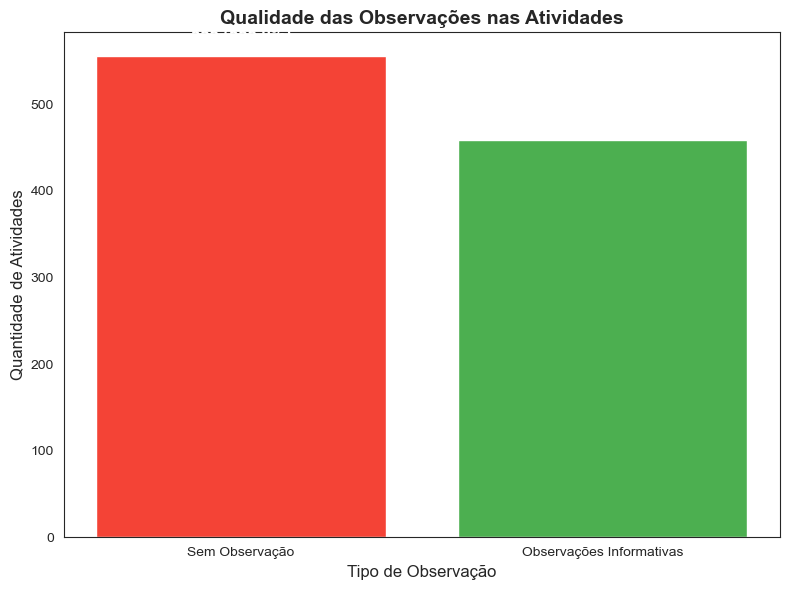

In [435]:
import matplotlib.pyplot as plt

# Contar quantas observações são apenas "sem observação"
sem_obs = atividades[atividades['Observações'].str.lower().str.strip() == 'sem observação']
com_obs = atividades[atividades['Observações'].str.lower().str.strip() != 'sem observação']

# Totais
total = len(atividades)
percent_sem_obs = len(sem_obs) / total * 100
percent_com_obs = len(com_obs) / total * 100

# Criando o gráfico
plt.figure(figsize=(8, 6))
labels = ['Sem Observação', 'Observações Informativas']
values = [len(sem_obs), len(com_obs)]
colors = ['#f44336', '#4caf50']

# Gráfico de barras
plt.bar(labels, values, color=colors)

# Adicionando as porcentagens e os números nas barras
for i, v in enumerate(values):
    plt.text(i, v + 20, f'{v} ({values[i]:.1f}%)', ha='center', color='white', fontsize=12, fontweight='bold')

# Título e Labels
plt.title('Qualidade das Observações nas Atividades', fontsize=14, fontweight='bold')
plt.ylabel('Quantidade de Atividades', fontsize=12)
plt.xlabel('Tipo de Observação', fontsize=12)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

### Etapa 2 - Quais são os principais insights sobre as reuniões e os contatos com os clientes?

### 1 - Alguns clientes passaram o trimestre inteiro sem nenhum contato registrado, podendo gerar falha no processo de acompanhamento.

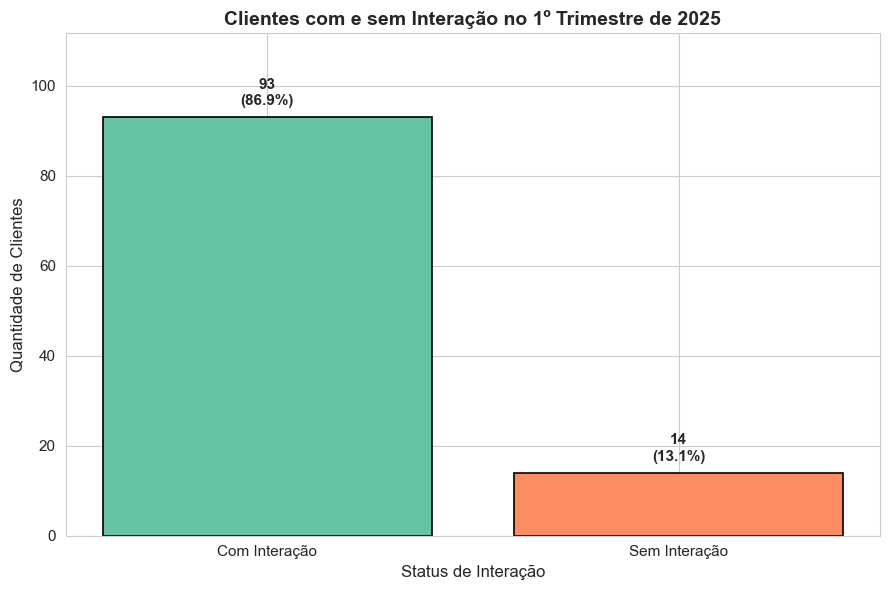

In [438]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados
clientes_com_atividade = atividades['Cliente'].unique()
clientes_sem_contato = clientes[~clientes['Cliente'].isin(clientes_com_atividade)]

# Contagens
qtd_com_interacao = len(clientes_com_atividade)
qtd_sem_interacao = len(clientes_sem_contato)
total_clientes = qtd_com_interacao + qtd_sem_interacao

# Estilo visual
sns.set_style("whitegrid")
cores = sns.color_palette("Set2", 2)

# Gráfico
plt.figure(figsize=(9, 6))
barras = plt.bar(['Com Interação', 'Sem Interação'],
                 [qtd_com_interacao, qtd_sem_interacao],
                 color=cores, edgecolor='black', linewidth=1.2)

# Anotar valores e porcentagens
for barra in barras:
    valor = barra.get_height()
    percentual = valor / total_clientes * 100
    plt.text(barra.get_x() + barra.get_width() / 2,
             valor + 2,
             f'{int(valor)}\n({percentual:.1f}%)',
             ha='center', va='bottom', fontsize=11, fontweight='bold')

# Ajustar o limite do eixo Y
plt.ylim(0, max(qtd_com_interacao, qtd_sem_interacao) * 1.20)

# Título e rótulos
plt.title('Clientes com e sem Interação no 1º Trimestre de 2025',
          fontsize=14, fontweight='bold')
plt.ylabel('Quantidade de Clientes', fontsize=12)
plt.xlabel('Status de Interação', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

# Layout final
plt.tight_layout()
plt.show()



### 2 -  Muita concentração de atendimentos em poucos responsáveis pode  indicar sobrecarga em um funcionário, afetando a qualidade no atendimento e também o funcionário poderia ter burnout.

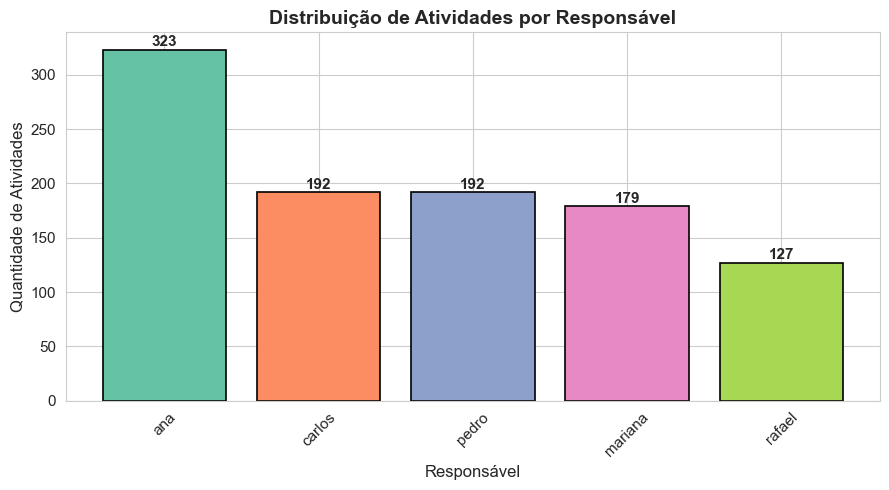

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns

# Dados de atividades por responsável
responsaveis_atividade = atividades['Responsável'].value_counts()

# Estilo visual
sns.set_style("whitegrid")
cores = sns.color_palette("Set2", len(responsaveis_atividade))  # Usando a mesma paleta

# Criando o gráfico de barras
plt.figure(figsize=(9, 5))
barras = plt.bar(responsaveis_atividade.index, responsaveis_atividade.values, 
                 color=cores, edgecolor='black', linewidth=1.2)

# Adicionando rótulos nas barras
for barra in barras:
    altura = barra.get_height()
    plt.text(barra.get_x() + barra.get_width() / 2,
             altura + 0.5,
             f'{int(altura)}',
             ha='center', va='bottom',
             fontsize=11, fontweight='bold')

# Título e eixos
plt.title('Distribuição de Atividades por Responsável', fontsize=14, fontweight='bold')
plt.ylabel('Quantidade de Atividades', fontsize=12)
plt.xlabel('Responsável', fontsize=12)
plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

# Finalização
plt.tight_layout()
plt.show()


### 3 - Clientes de alto MRR com baixa interação

In [442]:
# Contar número de atividades por cliente
interacoes_por_cliente = atividades['Cliente'].value_counts().reset_index()
interacoes_por_cliente.columns = ['Cliente', 'Qtd_Interacoes']

# Juntar com a tabela de clientes
clientes_com_interacoes = pd.merge(clientes, interacoes_por_cliente, on='Cliente', how='left').fillna(0)

# Converter Qtd_Interacoes para inteiro
clientes_com_interacoes['Qtd_Interacoes'] = clientes_com_interacoes['Qtd_Interacoes'].astype(int)

# Ver clientes com MRR alto e poucas interações
mrr_alto_baixa_interacao = clientes_com_interacoes[clientes_com_interacoes['MRR'] > 10000].sort_values('Qtd_Interacoes')

print("Clientes com MRR > 10.000 e poucas interações:")
print(mrr_alto_baixa_interacao[['Cliente', 'MRR', 'Qtd_Interacoes']].head())


Clientes com MRR > 10.000 e poucas interações:
        Cliente      MRR  Qtd_Interacoes
105  cliente 92 11240.00               1
106  cliente 93 16110.00               2
104  cliente 91 12346.00               2
96   cliente 84 17334.00               2
76   cliente 66 16257.00               7


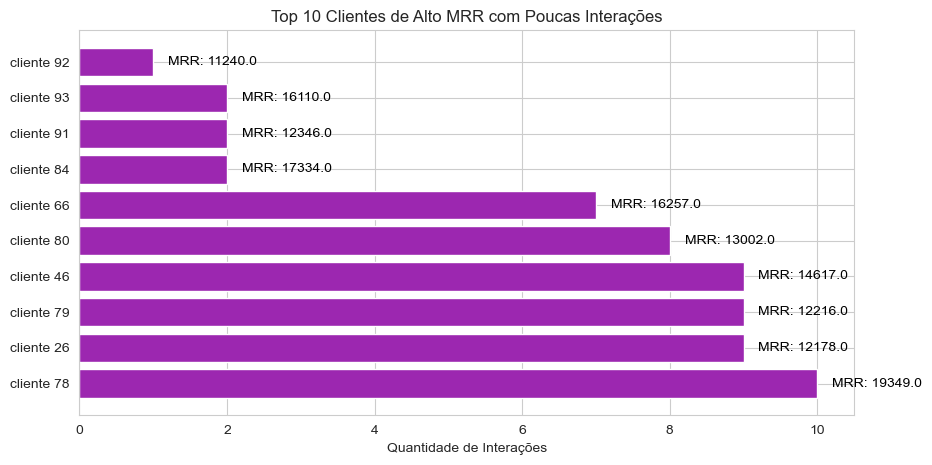

In [482]:
import matplotlib.pyplot as plt

# Plotando o gráfico de barras horizontais
plt.figure(figsize=(10, 5))

# Barras para as interações
plt.barh(top_mrr_baixo_contato['Cliente'], top_mrr_baixo_contato['Qtd_Interacoes'], color='#9c27b0', label='Qtd. Interações')

# Adicionando as anotações de MRR na barra
for i, (cliente, mrr, qtd_interacoes) in enumerate(zip(top_mrr_baixo_contato['Cliente'], 
                                                       top_mrr_baixo_contato['MRR'], 
                                                       top_mrr_baixo_contato['Qtd_Interacoes'])):
    plt.text(qtd_interacoes + 0.2, i, f'MRR: {mrr}', va='center', ha='left', color='black', fontsize=10)

# Definindo o título, rótulos e invertendo o eixo Y
plt.xlabel('Quantidade de Interações')
plt.title('Top 10 Clientes de Alto MRR com Poucas Interações')
plt.gca().invert_yaxis()

plt.show()



Ao cruzar MRR com a quantidade de atividades por cliente, surgem clientes com alto valor mensal recorrente recebendo poucas interações.
Esses clientes são importantes financeiramente e deveriam ter uma atenção proporcional.
